<center><h1 style="background-color: #C6F3CD; border-radius: 10px; color: #FFFFFF; padding: 5px;">
Multicollinearity
</h1><center/>

**Link to the article** :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
n = 200

size = np.random.normal(100, 12, n)               # size of the house
rooms = size / 20 + np.random.normal(0, 0.2, n)   # almost a linear function of size
age = np.random.normal(30, 6, n)                  # unrelated variable

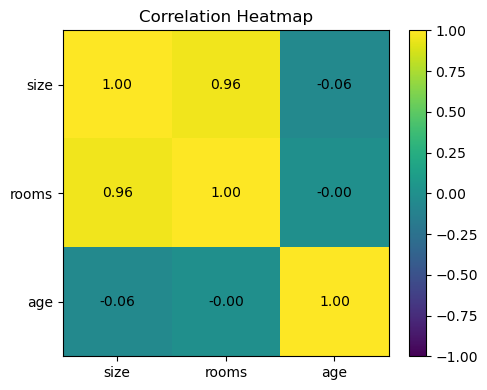

In [3]:
df = pd.DataFrame({"size": size, "rooms": rooms, "age": age})
corr = df.corr()
fig, ax = plt.subplots(figsize=(5, 4))
im = ax.imshow(corr.values, vmin=-1, vmax=1)

# axis ticks
features = corr.columns
ax.set_xticks(range(len(features)))
ax.set_yticks(range(len(features)))
ax.set_xticklabels(features)
ax.set_yticklabels(features)

# annotate cells
for i in range(len(features)):
    for j in range(len(features)):
        ax.text(j, i, f"{corr.values[i, j]:.2f}", ha="center", va="center")

fig.colorbar(im, ax=ax)
ax.set_title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [7]:
# Add constant for regression intercept
X = sm.add_constant(df)
X

,const,size,rooms,age
0,1.0,121.168628,5.984595,26.408076
1,1.0,104.801887,5.192218,23.304618
2,1.0,111.744856,5.807175,34.599979
3,1.0,126.890718,6.475589,32.137757
4,1.0,122.410696,6.248561,19.388769
...,...,...,...,...
195,1.0,97.941444,4.744774,32.275413
196,1.0,109.261487,5.634659,27.179803
197,1.0,109.882050,5.722323,28.699611
198,1.0,125.958831,6.591257,24.419061


In [8]:
# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                   for i in range(X.shape[1])]

vif_data

,Feature,VIF
0,const,99.027598
1,size,12.578257
2,rooms,12.537163
3,age,1.038335
